In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
df=pd.read_csv("./drive/MyDrive/Colab Notebooks/iot-network-vpn-non_vpn/dataset/Realtime traffic/train/train_vpn_nonvpn_labelled_dataset.csv")
df1=pd.read_csv("./drive/MyDrive/Colab Notebooks/iot-network-vpn-non_vpn/dataset/Realtime traffic/test/test_vpn_nonvpn_labelled_dataset.csv")

In [3]:
def labelEncoding(feature):
  data=feature.str.replace('.','')
  return data.astype(int)
  

In [4]:
print(df.info())
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815899 entries, 0 to 815898
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          815899 non-null  int64  
 1   Time         815899 non-null  float64
 2   Source       815899 non-null  object 
 3   Destination  815899 non-null  object 
 4   Protocol     815899 non-null  object 
 5   Length       815899 non-null  int64  
 6   Info         815879 non-null  object 
 7   Label        815899 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 49.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691584 entries, 0 to 691583
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No.          691584 non-null  int64  
 1   Time         691584 non-null  float64
 2   Source       691584 non-null  object 
 3   Destination  691584 non-null  object 
 4   Protocol     691584

In [5]:
df = df.dropna()
df1 = df1.dropna()
df[df.Destination.str.match('^\d+\.\d+\.\d+\.\d+')==False]

,No.,Time,Source,Destination,Protocol,Length,Info,Label
346851,346852,1352.819246,fe80::70bb:2d69:487:bb83,ff02::2,ICMPv6,48,Router Solicitation,VPN
405270,1377,13.539108,6a:fb:fd:eb:c2:95,Broadcast,ARP,42,Who has 192.168.137.1? Tell 192.168.137.163,NON-VPN
405271,1378,13.539128,46:1c:a8:a1:89:d7,6a:fb:fd:eb:c2:95,ARP,42,192.168.137.1 is at 46:1c:a8:a1:89:d7,NON-VPN
407173,3280,34.092551,6a:fb:fd:eb:c2:95,46:1c:a8:a1:89:d7,ARP,42,Who has 192.168.137.1? Tell 192.168.137.163,NON-VPN
407174,3281,34.092628,46:1c:a8:a1:89:d7,6a:fb:fd:eb:c2:95,ARP,42,192.168.137.1 is at 46:1c:a8:a1:89:d7,NON-VPN
...,...,...,...,...,...,...,...,...
796649,392756,1747.134204,46:1c:a8:a1:89:d7,6a:fb:fd:eb:c2:95,ARP,42,192.168.137.1 is at 46:1c:a8:a1:89:d7,NON-VPN
798646,394753,1751.599400,Lemobile_d3:c6:3e,Broadcast,ARP,42,Who has 192.168.137.1? Tell 192.168.137.48,NON-VPN
798647,394754,1751.599441,46:1c:a8:a1:89:d7,Lemobile_d3:c6:3e,ARP,42,192.168.137.1 is at 46:1c:a8:a1:89:d7,NON-VPN
801401,397508,1755.671236,6a:fb:fd:eb:c2:95,Broadcast,ARP,42,Who has 192.168.137.1? Tell 192.168.137.163,NON-VPN


In [6]:
df=df[df.Destination.str.match('^\d+\.\d+\.\d+\.\d+')==True]
df=df[df.Source.str.match('^\d+\.\d+\.\d+\.\d+')==True]

df1=df1[df1.Destination.str.match('^\d+\.\d+\.\d+\.\d+')==True]
df1=df1[df1.Source.str.match('^\d+\.\d+\.\d+\.\d+')==True]

df["Time"]=df["Time"].astype(int)
df1["Time"]=df1["Time"].astype(int)

print(df)
print(df1)

           No.  Time           Source     Destination Protocol  Length  \
0            1     0    172.27.232.44  52.159.127.243  TLSv1.2     139   
1            2     0   52.159.127.243   172.27.232.44  TLSv1.2     209   
2            3     0    172.27.232.44  52.159.127.243      TCP      40   
3            4    10   162.247.241.14   172.27.232.44      TCP      40   
4            5    10    172.27.232.44  162.247.241.14      TCP      40   
...        ...   ...              ...             ...      ...     ...   
815894  412001  1772  192.168.137.163  142.250.67.162     QUIC      78   
815895  412002  1772    223.196.93.13  192.168.137.48      UDP    1292   
815896  412003  1772    223.196.93.13  192.168.137.48      UDP    1292   
815897  412004  1772    223.196.93.13  192.168.137.48      UDP    1292   
815898  412005  1772    223.196.93.13  192.168.137.48      UDP    1292   

                                                     Info    Label  
0                                        A

In [7]:
df=df.drop(['Info',"No."], axis=1)
df["Source"]=labelEncoding(df["Source"])
df["Destination"]=labelEncoding(df["Destination"])

df1=df1.drop(['Info',"No."], axis=1)
df1["Source"]=labelEncoding(df1["Source"])
df1["Destination"]=labelEncoding(df1["Destination"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [8]:
objList = df.select_dtypes(include = "object").columns
objList

Index(['Protocol', 'Label'], dtype='object')

In [9]:
le = LabelEncoder()
for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
    df1[feat] = le.fit_transform(df1[feat].astype(str))
print (df.info())
print (df1.info())
df['Label'].value_counts()
df1['Label'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815530 entries, 0 to 815898
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Time         815530 non-null  int64
 1   Source       815530 non-null  int64
 2   Destination  815530 non-null  int64
 3   Protocol     815530 non-null  int64
 4   Length       815530 non-null  int64
 5   Label        815530 non-null  int64
dtypes: int64(6)
memory usage: 43.6 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 690399 entries, 0 to 691583
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype
---  ------       --------------   -----
 0   Time         690399 non-null  int64
 1   Source       690399 non-null  int64
 2   Destination  690399 non-null  int64
 3   Protocol     690399 non-null  int64
 4   Length       690399 non-null  int64
 5   Label        690399 non-null  int64
dtypes: int64(6)
memory usage: 36.9 MB
None


1    410283
0    280116
Name: Label, dtype: int64

In [10]:
X=df.drop(['Label'], axis=1)
X.head()

X1=df1.drop(['Label'], axis=1)
X1.head()

,Time,Source,Destination,Protocol,Length
0,0,1722723248,17319419171,23,85
1,0,1722723248,17319419171,23,85
2,0,1722723248,17319419171,23,92
3,0,1722723248,17319419171,23,87
4,0,1722723248,17319419171,23,87


In [11]:
Y=df['Label']
Y.head()

Y1=df1['Label']
Y1.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

In [12]:
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=50)
X_train=X
y_train=Y
X_test=X1
y_test=Y1

In [13]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-1.85482493, -0.49825293,  0.10939497,  0.97504645, -1.14755692],
       [-1.85482493,  0.37275767, -0.58371954,  0.97504645, -1.02911807],
       [-1.85482493, -0.49825293,  0.10939497,  0.20096442, -1.31506329],
       ...,
       [ 1.85976707, -0.48945852, -0.34330969,  1.49110114,  0.80330009],
       [ 1.85976707, -0.48945852, -0.34330969,  1.49110114,  0.80330009],
       [ 1.85976707, -0.48945852, -0.34330969,  1.49110114,  0.80330009]])

In [14]:
from sklearn.decomposition import PCA
  
pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
  
explained_variance = pca.explained_variance_ratio_

In [15]:
dtree_model = DecisionTreeClassifier(max_depth = 6).fit(X_train, y_train)

In [16]:
dtree_predictions = dtree_model.predict(X_test)#testing

In [17]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, dtree_predictions))

ACCURACY OF THE MODEL:  0.8260585545459944


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

[[260831  19285]
 [100804 309479]]


In [20]:
from sklearn.metrics import (roc_curve, auc, roc_auc_score,confusion_matrix,classification_report)

print(classification_report(y_test,dtree_predictions))


              precision    recall  f1-score   support

           0       0.72      0.93      0.81    280116
           1       0.94      0.75      0.84    410283

    accuracy                           0.83    690399
   macro avg       0.83      0.84      0.83    690399
weighted avg       0.85      0.83      0.83    690399



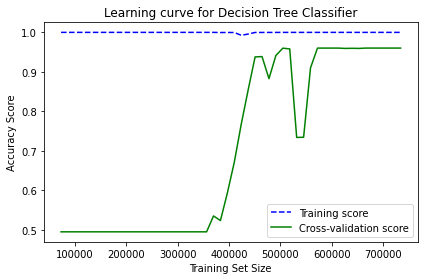

In [21]:
#Importing Required Libraries and Modules

from sklearn.model_selection import learning_curve


# Obtain scores from learning curve function
# cv is the number of folds while performing Cross Validation
sizes, training_scores, testing_scores = learning_curve(DecisionTreeClassifier(max_depth = 6), X, Y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 50))

# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)

# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)

# dotted blue line is for training scores and green line is for cross-validation score

plt.plot(sizes, mean_training, '--', color="b", label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")

# Drawing plot
plt.title("Learning curve for Decision Tree Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


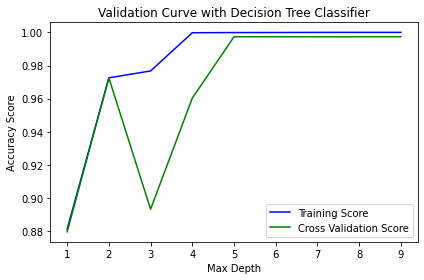

In [22]:
# Import Required libraries
from sklearn.model_selection import validation_curve

# Loading dataset

# X contains the data and y contains the labels
# Setting the range for the parameter (from 1 to 10)
parameter_range = np.arange(1, 10, 1)

# Calculate accuracy on training and test set using the
# gamma parameter with 5-fold cross validation
train_score, test_score = validation_curve(DecisionTreeClassifier(), X, Y,
									param_name = "max_depth",
									param_range = parameter_range,
										cv = 5, scoring = "accuracy")

# Calculating mean and standard deviation of training score
mean_train_score = np.mean(train_score, axis = 1)
std_train_score = np.std(train_score, axis = 1)

# Calculating mean and standard deviation of testing score
mean_test_score = np.mean(test_score, axis = 1)
std_test_score = np.std(test_score, axis = 1)

# Plot mean accuracy scores for training and testing scores
plt.plot(parameter_range, mean_train_score,
	label = "Training Score", color = 'b')
plt.plot(parameter_range, mean_test_score,
label = "Cross Validation Score", color = 'g')

# Creating the plot
plt.title("Validation Curve with Decision Tree Classifier")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc = 'best')
plt.show()


In [23]:
!pip install joblib==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
import joblib

In [25]:
joblib.dump(dtree_model,"./decision_tree_model1.sav")

['./decision_tree_model1.sav']